In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## 1. Read csv file

In [2]:
dataset = pd.read_csv('dataset/Medical_insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


## 2. Check if there is any missing data

In [3]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 3. Apply one-hot encoding for 'region', 'sex', 'smoker' columns

In [4]:
# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
cols_categorical = ['region', 'sex', 'smoker']
one_hot_encoded_array = encoder.fit_transform(dataset[cols_categorical])
one_hot_df = pd.DataFrame(one_hot_encoded_array, 
                          columns=encoder.get_feature_names_out(cols_categorical))

# Concatenate the one-hot encoded DataFrame with the original dataset
df_sklearn_encoded = pd.concat([dataset.drop(cols_categorical, axis=1), one_hot_df], axis=1)

In [5]:
df_sklearn_encoded

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2768,21,34.600,0,2020.17700,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2769,19,26.030,1,16450.89470,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2770,23,18.715,0,21595.38229,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


# Feature Normalisation

## 4.Apply MinMaxScaler

In [6]:
# Create a scaler with feature range of [-1, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply to your DataFrame (let's say df)

# Option 2: Apply to specific columns
numeric_cols = ['age', 'bmi', 'charges']  # Adjust to your columns
df_sklearn_encoded[numeric_cols] = scaler.fit_transform(df_sklearn_encoded[numeric_cols])

In [7]:
# Verify the transformation
print(df_sklearn_encoded[numeric_cols].describe())

               age          bmi      charges
count  2772.000000  2772.000000  2772.000000
mean      0.458906     0.396593     0.193771
std       0.306119     0.164903     0.193967
min       0.000000     0.000000     0.000000
25%       0.173913     0.276029     0.056919
50%       0.456522     0.389763     0.131067
75%       0.717391     0.506053     0.246708
max       1.000000     1.000000     1.000000


## 5. Split into training and test sets

In [8]:
X = df_sklearn_encoded.drop('charges', axis=1)  #Input features
y = df_sklearn_encoded['charges']               #Target variable

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

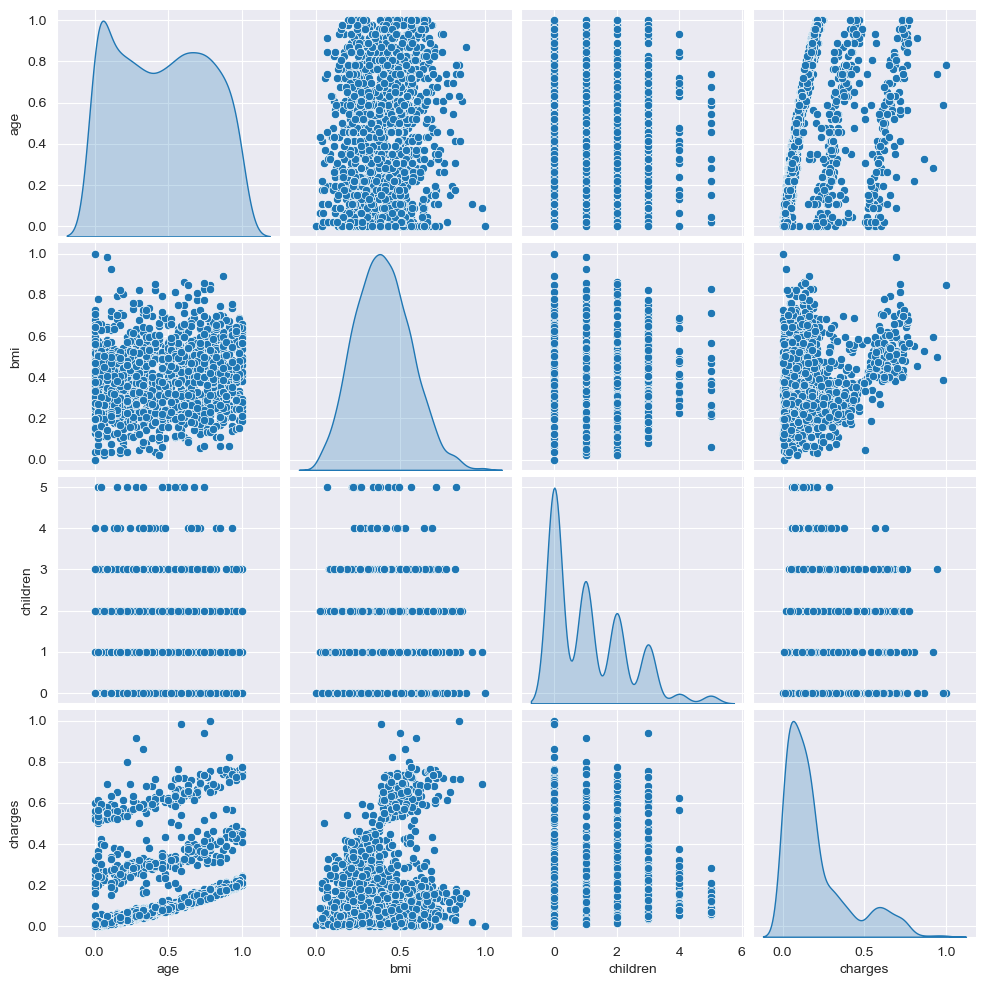

In [10]:
sns.pairplot(df_sklearn_encoded[['age', 'bmi', 'children', 'charges']], diag_kind='kde')

In [11]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2217.0,0.463239,0.302879,0.0,0.195652,0.456522,0.717391,1.000000
bmi,2217.0,0.396972,0.164197,0.0,0.276029,0.391041,0.506053,0.985203
children,2217.0,1.104646,1.211729,0.0,0.000000,1.000000,2.000000,5.000000
region_northeast,2217.0,0.239513,0.426882,0.0,0.000000,0.000000,0.000000,1.000000
region_northwest,2217.0,0.242670,0.428794,0.0,0.000000,0.000000,0.000000,1.000000
region_southeast,2217.0,0.271538,0.444853,0.0,0.000000,0.000000,1.000000,1.000000
region_southwest,2217.0,0.246279,0.430940,0.0,0.000000,0.000000,0.000000,1.000000
sex_female,2217.0,0.489400,0.500000,0.0,0.000000,0.000000,1.000000,1.000000
sex_male,2217.0,0.510600,0.500000,0.0,0.000000,1.000000,1.000000,1.000000
smoker_no,2217.0,0.790708,0.406895,0.0,1.000000,1.000000,1.000000,1.000000


# Linear Regression with 1 variable

In [12]:
X_train['bmi']

1864    0.562012
1997    0.506860
1336    0.264730
655     0.251278
261     0.292709
          ...   
1638    0.490987
1095    0.414044
1130    0.212806
1294    0.247915
860     0.851224
Name: bmi, Length: 2217, dtype: float64

In [13]:
# Train the Linear Regression model
model_single = LinearRegression()
history = model_single.fit(X_train[['bmi']], y_train)

In [14]:
X

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.217391,0.458434,3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.326087,0.181464,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.304348,0.347592,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2767,0.630435,0.789884,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2768,0.065217,0.501480,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2769,0.021739,0.270917,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2770,0.108696,0.074119,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [15]:
X_test

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
1106,0.673913,0.375706,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1321,0.956522,0.288808,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2313,0.847826,0.111380,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2274,0.086957,0.633306,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1432,0.000000,0.610842,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
930,0.173913,0.822437,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2610,0.500000,0.214689,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1700,0.195652,0.415389,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
100,0.500000,0.420769,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [16]:
# Make predictions for the first 10 rows of the test set
bmi_predictions = model_single.predict(X_test[['bmi']][:10])
bmi_predictions

array([0.19071225, 0.17105641, 0.13092319, 0.24897995, 0.24389864,
       0.15371302, 0.17352099, 0.26297637, 0.22768105, 0.18088433])

In [17]:
X_bmi = X[['bmi']]

In [51]:
# Make predictions and evaluate the model
y_pred_bmi = model_single.predict(X[['bmi']])

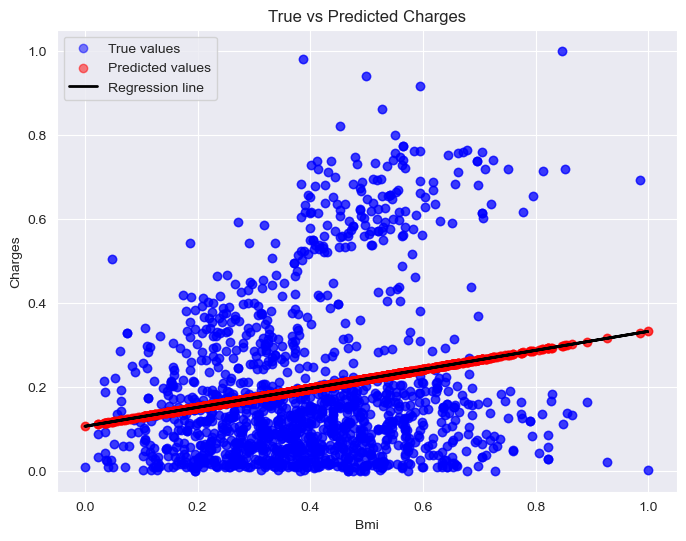

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_bmi, y, color='blue', label='True values', alpha=0.5)
plt.scatter(X_bmi, y_pred_bmi, color='red', label='Predicted values', alpha=0.5)
plt.plot(X_bmi, y_pred_bmi, color='black', linewidth=2, label='Regression line')

# Labels and legend
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.title('True vs Predicted Charges')
plt.legend()
plt.show()

In [53]:
# Calculate Mean Absolute Error (L1 loss / MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae) 

# Calculate Mean Squared Error (L2 loss / MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

Mean Absolute Error: 0.1279931107414166
Mean Squared Error: 0.027669929381115947


In [54]:
history = model_single.fit(X_train[['age']], y_train)


In [55]:
# Make predictions and evaluate the model
y_pred_age = model_single.predict(X[['age']])
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [56]:
X_age = X[['age']]

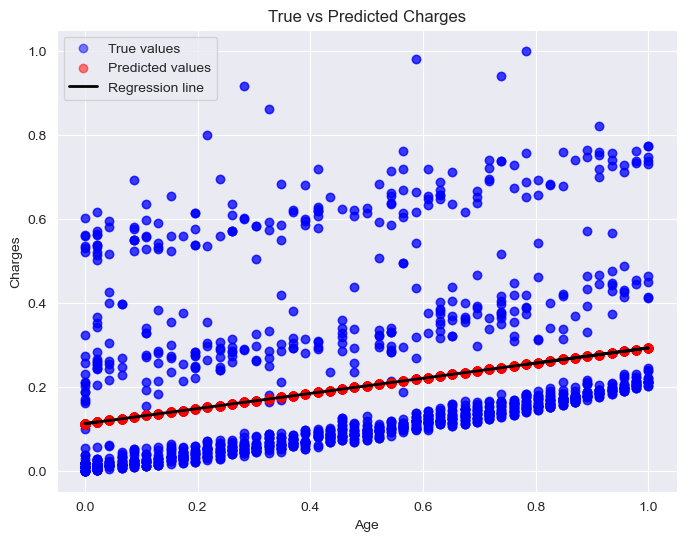

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(X_age, y, color='blue', label='True values', alpha=0.5)
plt.scatter(X_age, y_pred_age, color='red', label='Predicted values', alpha=0.5)
plt.plot(X_age, y_pred_age, color='black', linewidth=2, label='Regression line')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('True vs Predicted Charges')
plt.legend()
plt.show()

In [58]:
# Make predictions and evaluate the model
y_pred = model_single.predict(X_test[['age']])

In [59]:
# Calculate Mean Absolute Error (L1 loss / MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae) 

# Calculate Mean Squared Error (L2 loss / MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

Mean Absolute Error: 0.14406409588952584
Mean Squared Error: 0.03439049950604412


# Linear Regression with multiple inputs

In [60]:
X = df_sklearn_encoded.drop('charges', axis=1)  # Input multiple features
y = df_sklearn_encoded['charges']                   # Target variable

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Train the Linear Regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model_multiple.predict(X_test)

In [64]:
# Calculate Mean Absolute Error (L1 loss / MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae) 

# Calculate Mean Squared Error (L2 loss / MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

Mean Absolute Error: 0.06637914802643696
Mean Squared Error: 0.010176449048327879


# DNN

In [65]:
bmi = np.array(X_train['bmi'])

# Create a Normalization layer without specifying input_shape
bmi_normalizer = layers.Normalization(input_shape=[1, ], axis=None)
bmi_normalizer.adapt(bmi)

bmi_model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    bmi_normalizer,
    layers.Dense(units=1)
])

bmi_model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [66]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [67]:
dnn_bmi_model_single = build_and_compile_model(bmi_normalizer)

In [68]:
dnn_bmi_model_single.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [69]:
%%time
history = dnn_bmi_model_single.fit(
    X_train['bmi'],
    y_train,  # Corrected from X_test to y_train
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.07 s, sys: 941 ms, total: 5.01 s
Wall time: 3.77 s


In [70]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 5000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [age]')
  plt.legend()
  plt.grid(True)

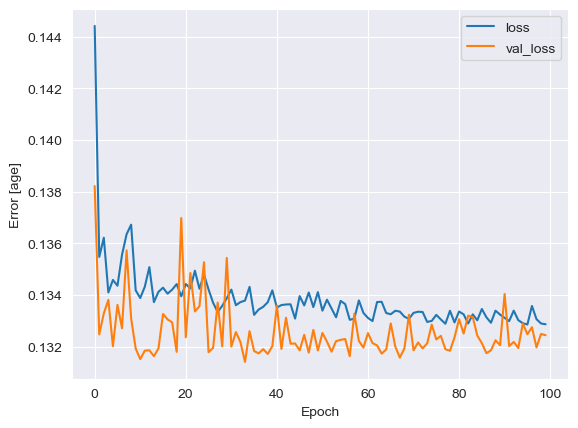

In [71]:
plot_loss(history)

In [72]:
test_results = {}

test_results['dnn_bmi_model'] = dnn_bmi_model_single.evaluate(
    X_test['bmi'], y_test,
    verbose=0)
print("Test results (loss and metrics):", test_results['dnn_bmi_model'])

Test results (loss and metrics): 0.1334494650363922


# Regression using a DNN and multiple inputs

In [73]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [74]:
normalizer.adapt(np.array(X_train))

In [75]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (2217, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

In [76]:
print(normalizer.mean.numpy())

[[0.4632386  0.39697212 1.104646   0.23951286 0.24267027 0.2715381
  0.24627875 0.4894001  0.5105999  0.7907082  0.20929183]]


In [77]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (2217, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

In [78]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 4.01 s, sys: 854 ms, total: 4.86 s
Wall time: 3.51 s


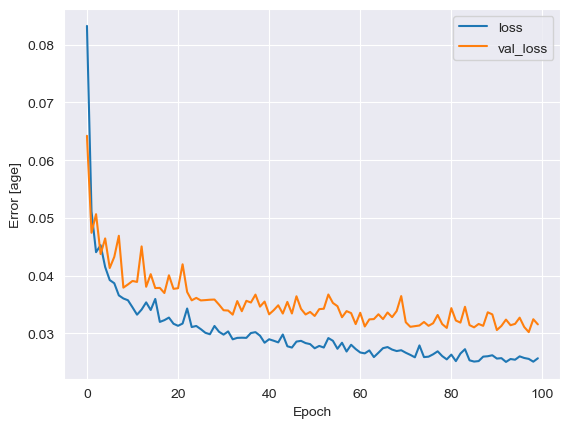

In [79]:
plot_loss(history)

In [80]:
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)

In [81]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
dnn_bmi_model,0.133449
dnn_model,0.032968


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


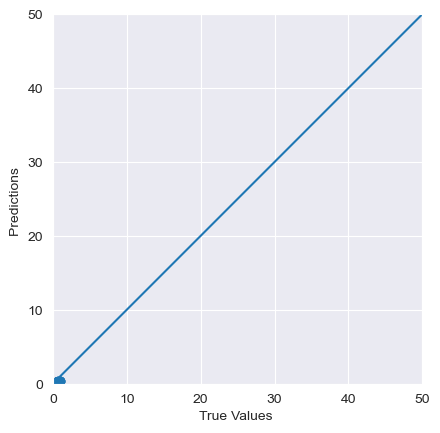

In [82]:
# Ensure y_pred is predicted using y_test instead of y_train
y_pred = dnn_model.predict(y_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

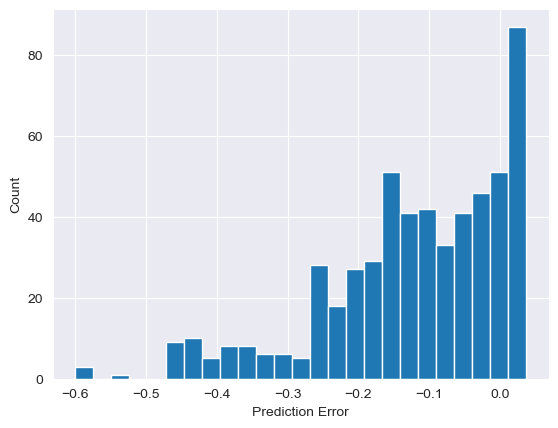

In [83]:
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [84]:
dnn_model.save('dnn_model.keras')

In [86]:
import tensorflow as tf

# Load the model
reloaded = tf.keras.models.load_model('dnn_model.keras')

# Assuming x_test and y_test are the correct test datasets
test_results = {}
test_results['reloaded'] = reloaded.evaluate(
    X_test, y_test, verbose=0)

In [87]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
reloaded,0.032968
